In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import tensorflow as tf
import timeit
import os
from six.moves import cPickle
from text_utils import TextLoader
from tensorflow.contrib import rnn
from char_rnn_model import Model
import numpy as np
import time
import matplotlib.pyplot as plt


# Define directories, hyperparameter

In [16]:
directory = "shakespeare.txt"
batch_size = 100
seq_len = 15
learning_rate = 0.001
num_layers = 2
rnn_size = 256
num_steps = 20

# Load data using TextLoader object

In [17]:
text_load = TextLoader(directory, batch_size, seq_len)
#text_train_in, text_valid_in, text_train_out, text_valid_out = text_load.split_data()
vocab_size = len(text_load.char)
vocab_reverse = text_load.vocab_reverse
print(vocab_size)

['\n' '\r' ' ' '!' '&' "'" ',' '-' '.' ':' ';' '?' 'a' 'b' 'c' 'd' 'e' 'f'
 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x'
 'y' 'z']
38


# Create your model object

In [18]:
the_model = Model(seq_len, rnn_size, num_layers, learning_rate, vocab_size)

#load the data
text_train_in = np.load("text_train_in.npy")
text_train_out = np.load("text_train_out.npy")
text_valid_in = np.load("text_valid_in.npy")
text_valid_out = np.load("text_valid_out.npy")

file_name = 'uni_char'
with open(file_name, 'rb') as handle:
    vocab = cPickle.load(handle)

print(text_train_in.shape)
print(text_train_out.shape)


start = "the king"
split = [[i for i in start]]
print(split[0][0])

val = split[0][0]

for i in range(len(split[0])):
    #print(type(split[0]))
    val = split[0][i]
    split[0][i] = [vocab[val]]
print(split)

(900, 100, 15, 1)
(900, 100, 38)
t
[[[31], [19], [16], [2], [22], [20], [25], [18]]]


# Training

--- 28.930204391479492 seconds ---
step 1, Accuracy training= 2.530
step 1, Accuracy Valid= 2.459
--- 29.037286281585693 seconds ---
--- 29.164608001708984 seconds ---
step 3, Accuracy training= 2.284
step 3, Accuracy Valid= 2.264
--- 29.41400933265686 seconds ---
--- 29.087453842163086 seconds ---
step 5, Accuracy training= 2.124
step 5, Accuracy Valid= 2.145
--- 28.99977421760559 seconds ---
--- 28.53965926170349 seconds ---
step 7, Accuracy training= 2.006
step 7, Accuracy Valid= 2.087
--- 28.646410942077637 seconds ---
--- 28.59242582321167 seconds ---
step 9, Accuracy training= 1.910
step 9, Accuracy Valid= 2.030
--- 29.537954092025757 seconds ---
--- 28.69921374320984 seconds ---
step 11, Accuracy training= 1.833
step 11, Accuracy Valid= 1.994
--- 28.359142541885376 seconds ---
--- 28.796287536621094 seconds ---
step 13, Accuracy training= 1.763
step 13, Accuracy Valid= 1.984
--- 29.264718294143677 seconds ---
--- 28.73476815223694 seconds ---
step 15, Accuracy training= 1.704
st

Text(0.5, 1.0, 'Epoch vs loss')

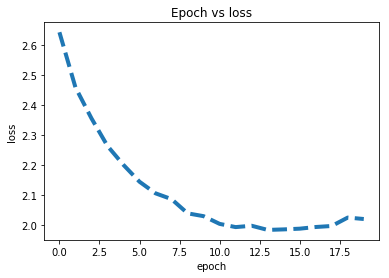

In [19]:
#Initialize the variables
def get_session():
    """Create a session that dynamically allocates memory."""
    # See: https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    session = tf.Session(config=config)
    return session
sess = get_session()
init = tf.global_variables_initializer()

acc_list = []
steps = []

test_range = []
correct_guess = []
net_guess = []

#with tf.Session() as sess:
sess.run(init)

for i in range(num_steps):
    start_time = time.time()
    #epoch training
    acc_t = 0
    for j in range(len(text_train_in)):
        #fetch batch
        batch_x = text_train_in[j]
        #print(batch_x.shape)
        batch_y = text_train_out[j]
        #print(batch_y.shape)
        #run optimization
        sess.run(the_model.train_op, feed_dict={the_model.X:batch_x, the_model.Y:batch_y})

        acc_t += sess.run(the_model.loss, feed_dict={the_model.X:batch_x, the_model.Y:batch_y})

    acc_t = acc_t/len(text_train_in)
    if (i+1) % (num_steps/10) == 0:
        print("step "+str(i)+", Accuracy training= {:.3f}".format(acc_t))

    #epoch validation
    acc = 0
    for j in range(len(text_valid_in)):
        #fetch batch
        batch_x = text_valid_in[j]
        batch_y = text_valid_out[j]
        #run optimization
        acc += sess.run(the_model.loss, feed_dict={the_model.X:batch_x, the_model.Y:batch_y})

    acc = acc/len(text_valid_in)
    if (i+1) % (num_steps/10) == 0:
        print("step "+str(i)+", Accuracy Valid= {:.3f}".format(acc))
    acc_list.append(acc)
    steps.append(i)

    print("--- %s seconds ---" % (time.time() - start_time))

print("Training finished!")

#string_back = the_model.sample(sess, vocab, vocab_reverse, 15, "first")
#string_round = np.round(string_back)
#print(string_back)
#print(string_back.shape)

'''
acc = 0
for k in range(len(tesla_test_in)):
#fetch batch
    batch_x = tesla_test_in[k]
    batch_y = tesla_test_out[k]
    #run optimization
    acc += sess.run(loss, feed_dict={X:batch_x, Y:batch_y})



acc = acc/len(tesla_test_in)
print("Test Accuracy= {:.3f}".format(acc))

#print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

#print the first images
for i in range(100):

    batch_x = [preserve_tesla[i][0:5]]
    #batch_y = tesla_test_out[0]
    #run optimization
    guesses = sess.run(logits, feed_dict={X:batch_x})

    test_range.append(i)
    correct_guess.append(preserve_tesla[i][5])
    net_guess.append(guesses[0])

'''

#for images in range(10):
#    cur_img = batch_x[images]
#    b,g,r = cv2.split(cur_img)
#    frame_rgb = cv2.merge((r,g,b))
#    plt.imshow(frame_rgb)
#    print("Guess:", guesses[images])
#    plt.show()
    
plt.figure()
# plot epoch vs accuracy
plt.plot(steps,acc_list,'--',lw=4)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Epoch vs loss')

#plt.figure()
# plot epoch vs accuracy
#plt.plot(test_range,correct_guess,'--',lw=4)
#plt.plot(test_range,net_guess,'--',lw=4)
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.title('Epoch vs accuracy')

# Generating Text

In [20]:
input_string = text_train_in[0][0]
final_string = []


for i in range(len(input_string)):
    curr_val = input_string[i][0]
    curr_val = vocab_reverse[curr_val*vocab_size]
    #print(curr_val)
    final_string.append(curr_val)

#print(final_string)
final_string = ''.join(final_string)
#print(final_string)

string_back = the_model.sample(sess, vocab, vocab_reverse, 200, final_string)
#string_round = np.round(string_back)
#print(string_back)
print("first string")
print(''.join(string_back))

input_string = text_train_in[0][1]
final_string = []


for i in range(len(input_string)):
    curr_val = input_string[i][0]
    curr_val = vocab_reverse[curr_val*vocab_size]
    #print(curr_val)
    final_string.append(curr_val)

#print(final_string)
final_string = ''.join(final_string)
#print(final_string)

string_back = the_model.sample(sess, vocab, vocab_reverse, 200, final_string)
#string_round = np.round(string_back)
#print(string_back)
print("second string")
print(''.join(string_back))


input_string = text_train_in[0][2]
final_string = []


for i in range(len(input_string)):
    curr_val = input_string[i][0]
    curr_val = vocab_reverse[curr_val*vocab_size]
    #print(curr_val)
    final_string.append(curr_val)

#print(final_string)
final_string = ''.join(final_string)
#print(final_string)

string_back = the_model.sample(sess, vocab, vocab_reverse, 200, final_string)
#string_round = np.round(string_back)
#print(string_back)
print("third string")
print(''.join(string_back))

input_string = text_valid_in[0][0]
final_string = []


for i in range(len(input_string)):
    curr_val = input_string[i][0]
    curr_val = vocab_reverse[curr_val*vocab_size]
    #print(curr_val)
    final_string.append(curr_val)

#print(final_string)
final_string = ''.join(final_string)
#print(final_string)

string_back = the_model.sample(sess, vocab, vocab_reverse, 200, final_string)
#string_round = np.round(string_back)
#print(string_back)
print("valid string")
print(''.join(string_back))

first string
l take him for the people in the people shanl be consul,
and the cody oface of the cody of hese?

sicinius:
he shall be to make in the whll.
i will make manesilg.

menenius:
she gods bnrnds to be to mnse a p
second string
yet to trouble he hade a madee and to de in the sreee and ho the people in the cotiorants,
and the preieity of the people.

menenius:
they have heer your poieesies in the mend of the weny showld be consul,
whet
third string
in hand? where he hs bear
that i am pnte as the people in the this oun andsy fe had mother,
and the body of him.
i whll not oo mers
the people spane along iim ont him then and the people in a petsle forle wou ar
valid string

and a petition of him on lerer, the oeople in the world
the people ane the cods.

messenger:
ie shey she gods 
ie iad no and terue the people she people,
and the gods pf him of the moos
the seopleer teans i
